In [1]:

import pandas as pd
import json
import numpy as np
import pylab

import matplotlib.pyplot as plt

json_filename='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/Data_tweets/clean_tweet.json'
     
tweet_df = pd.read_json(json_filename, orient="columns")





# Basic statistics and distributions

In [15]:
DT=[]
I=[]
DL=[]
DU=[]
U=[]
for i in range(500):
    I.append(i)
    DT.append(len(tweet_df[tweet_df['retweets']==i]))
    DL.append(len(tweet_df[tweet_df['likes']==i]))

for i in range(20000):
    DU.append(tweet_df['fullname'].value_counts().sort_values(ascending=False).iloc[i])
    U.append(tweet_df['fullname'].iloc[i])

In [19]:


plus1=0
for i in range(len(DU)):
    if DU[i]>=10:
        plus1+=1
print('number of people who have tweet at least 2 times:',plus1)
    

# Number of tweets
print('the french #balancetonporc campaign is composed of',len(tweet_df.index),'tweets')
print('\n')
# Number of users involved in the campaign
print('This Tweets are coming from ',len(tweet_df['fullname'].value_counts()),'different users')
print('\n')
# top users
print('The top-10 users are :','\n')

for i in range(10):
    print(tweet_df['fullname'].iloc[i], ' with ', tweet_df['fullname'].value_counts().iloc[i],'tweets')
print('\n')

# Stats par utilisateur:
print('The average number of tweet by user is :',round(tweet_df['fullname'].value_counts().mean(),2))
print('The standard deviation of the number of tweets by user is :',round(tweet_df['fullname'].value_counts().std(),2))
print('The  median of the number of tweets by user is :',round(tweet_df['fullname'].value_counts().median(),2))
print('\n')

# Retweets
print('The number of retweets involved in this campaign is',sum(tweet_df['retweets']))
print('Among the',len(tweet_df.index),'tweets involved in the campaign,',len(tweet_df[tweet_df['retweets']>1]),'were retweeted at least one time') 
print('\n')
tweet_df = tweet_df.sort_values(by='retweets', ascending=False)
tweet_df = tweet_df.reset_index(drop=True)
print('Each tweets was retweeted on average(Mean) of:', round(tweet_df['retweets'].mean(),2),'times', '\n')


    
print('Top 5 Retweeted tweets:')
print('------------------')
for i in range(5):
    print(tweet_df['text'].iloc[i], '-', tweet_df['retweets'].iloc[i],'retweets')
print('\n')
    
# Likes
print('The number of likes involved in this campaign is',sum(tweet_df['likes']))
print('Among the',len(tweet_df.index),'tweets involved in the campaign,',len(tweet_df[tweet_df['likes']>1]),'were liked at least one time') 
print('\n')
tweet_df = tweet_df.sort_values(by='likes', ascending=False)
tweet_df = tweet_df.reset_index(drop=True)
print('Each tweets was liked on average(Mean) of:', round(tweet_df['likes'].mean(),2),'times', '\n')
print('Top 5 liked tweets:')
print('-------------------')
for i in range(5):
    print(tweet_df['text'].iloc[i], '-', tweet_df['likes'].iloc[i],'likes')
print('\n')



number of people who have tweet at least 2 times: 676
the french #balancetonporc campaign is composed of 64232 tweets


This Tweets are coming from  31633 different users


The top-10 users are : 

Mélie  ✨  with  111 tweets
Celia  with  109 tweets
Marie Ricci  with  101 tweets
Céline  with  89 tweets
Baskets à Paillettes  with  88 tweets
Pari  with  82 tweets
Chap  with  81 tweets
Le Lapin Taquin  with  74 tweets
 🎵  with  71 tweets
Monox  with  71 tweets


The average number of tweet by user is : 2.03
The standard deviation of the number of tweets by user is : 3.39
The  median of the number of tweets by user is : 1.0


The number of retweets involved in this campaign is 372652
Among the 64232 tweets involved in the campaign, 10291 were retweeted at least one time


Each tweets was retweeted on average(Mean) of: 5.8 times 

Top 5 Retweeted tweets:
------------------
 Un homme marchait derrière moi  m’a mit la main entre les jambes  fois et m’a sorti  ça vous plait    j’ai porté plaint

# Graph of the main distribution

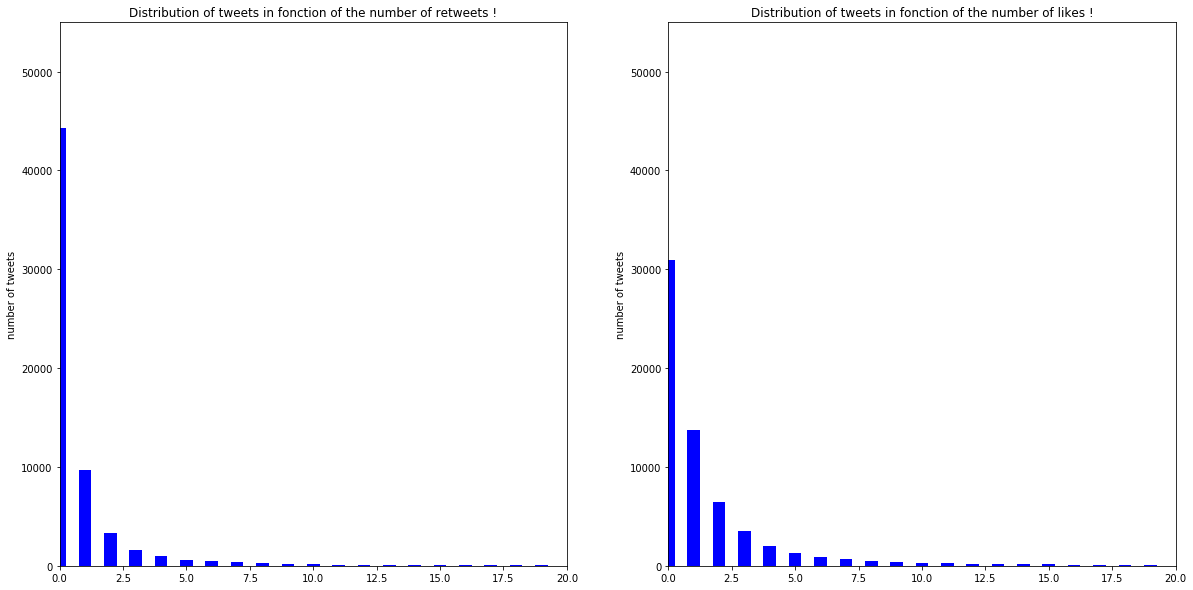

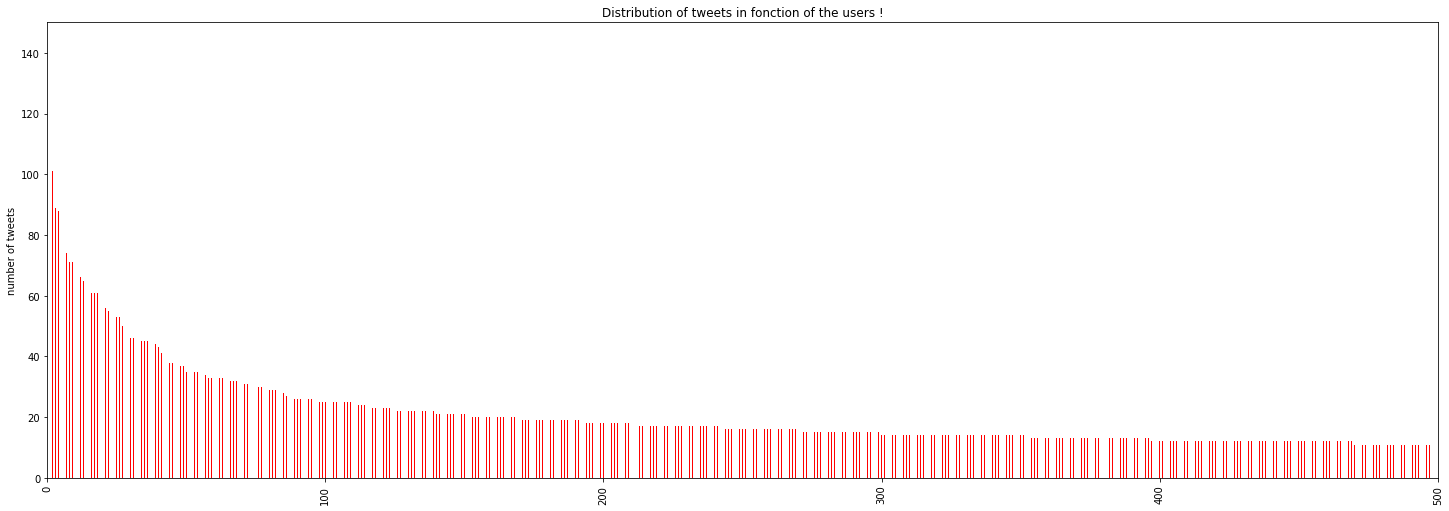

In [11]:
fig1 = plt.figure(figsize = (20, 10))

x = I[:20]
height = DT[:20]
width = 0.5
plt.tight_layout() #ajustement des etiquttes

plt.subplot(1,2,1) #fisrt graph
plt.bar(x, height, width, color='b')
plt.ylim(0,55000)
plt.xlim(0,20)
plt.ylabel('number of tweets')
plt.title('Distribution of tweets in fonction of the number of retweets !')


plt.subplot(1,2,2)#Second graphe
plt.bar(x,DL[:20], width, color='b')
plt.title('Distribution of tweets in fonction of the number of likes !')
plt.ylim(0,55000)
plt.xlim(0,20)

plt.ylabel('number of tweets')
plt.savefig('dristribution_retweetsBar.png')
plt.show()

fig2 = plt.figure(figsize = (20, 7))
ax = range(500)
height = DU[:500]
width = 0.2
plt.xticks(rotation=90)
plt.tight_layout() #ajustement des etiquttes
plt.bar(ax, height, width, color='r')
plt.ylim(0,150)
plt.xlim(0,500)
plt.ylabel('number of tweets')
plt.title('Distribution of tweets in fonction of the users !')
plt.savefig('dristribution_UserTweetsBar.png')
plt.show()


# Graph of temporal series

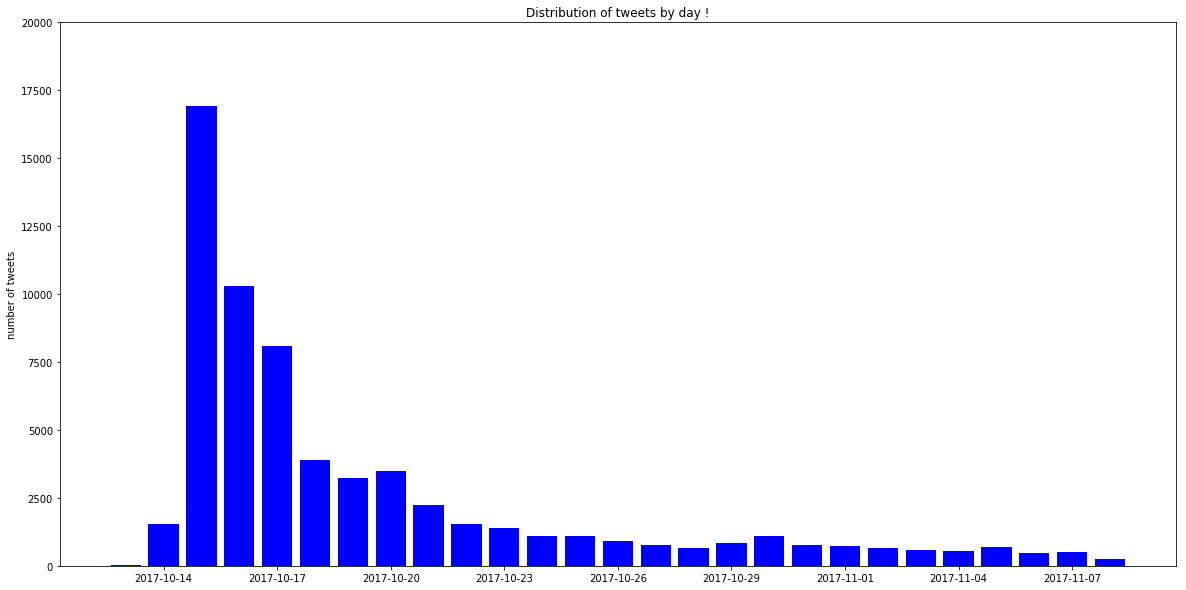

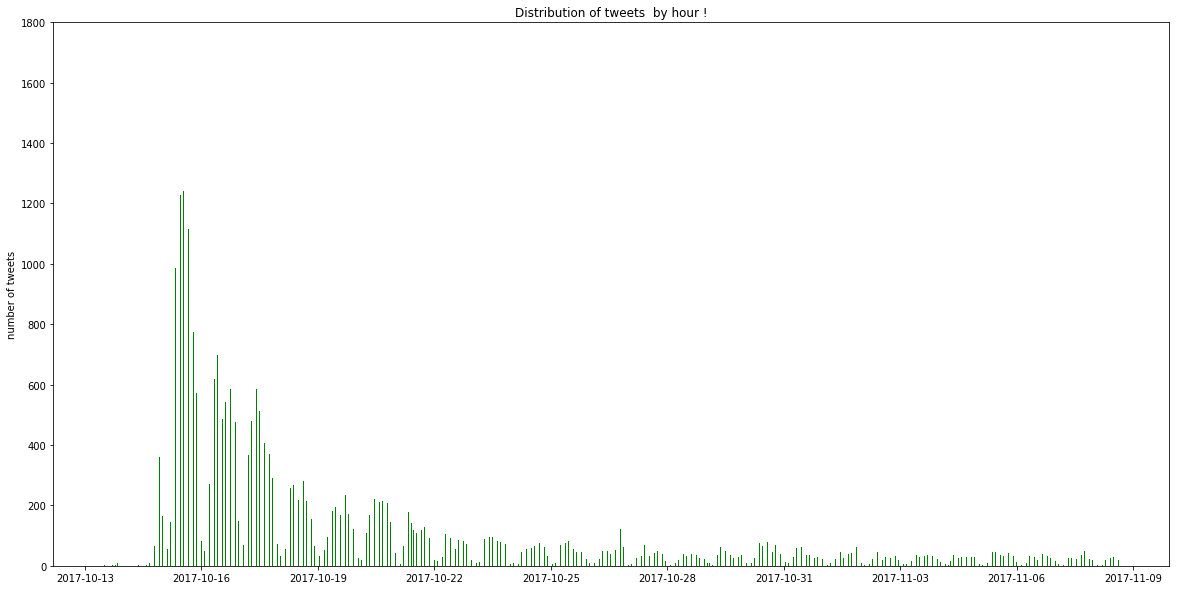

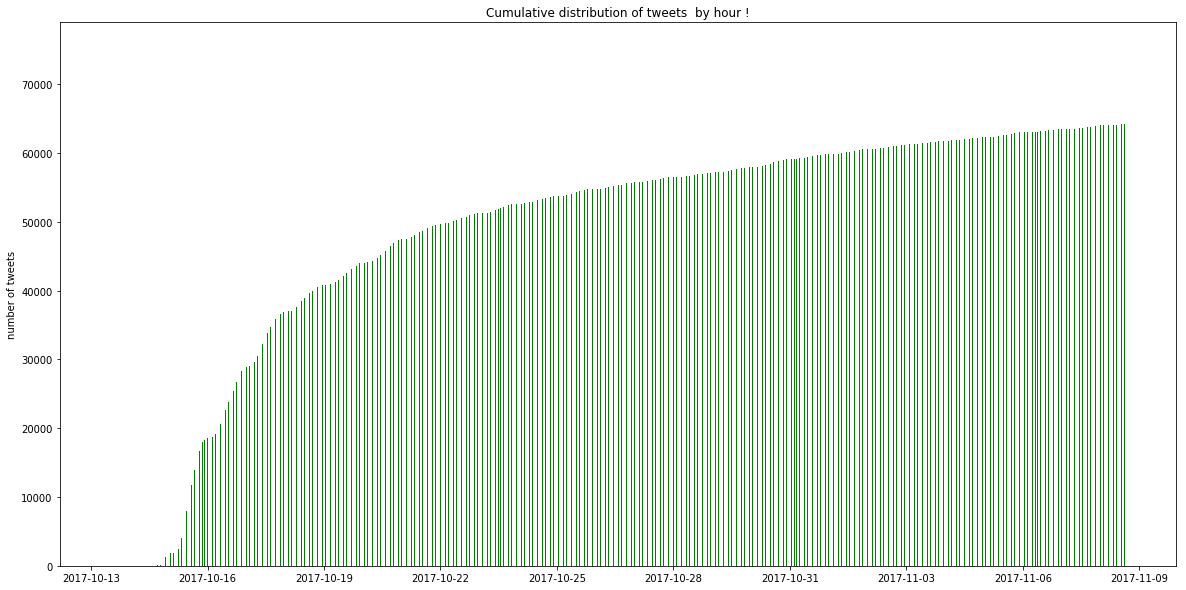

In [4]:
import datetime
tweet_df.head()
pd.to_datetime(tweet_df['timestamp'])
#Create a graph representing the activity of the campaign by day:
dataD=tweet_df.set_index('timestamp').groupby(pd.TimeGrouper('D')).count().dropna()['text']
dataH=tweet_df.set_index('timestamp').groupby(pd.TimeGrouper('H')).count().dropna()['text']
NTD=[]
NTH=[]
SNTH=[]

for i in range(len(dataD)):
    NTD.append(dataD[i])
for i in range(len(dataH)):
    NTH.append(dataH[i])
SNTH=[NTH[0]]
for i in range(len(NTH)-1):
    SNTH.append(SNTH[i]+NTH[i+1])

#print(TD,data,NTD)
#print(tweet_df['timestamp'].groupby(tweet_df['timestamp'].dayofweek).count())
#tweet_df['hod'] = [t.hour for t in tweet_df['timestamp']]
#tweet_df['dow'] = [t.dayofweek for t in tweet_df['timestamp']]
#print(tweet_df.groupby(tweet_df['timestamp'].map(lambda x: x.day)).count())
#df.set_index('timestamp').groupby(pd.TimeGrouper('D')).count().dropna()['text']

###### figure 3
fig3 = plt.figure(figsize = (20, 10))
#date = data.index.date.astype('O')
x = dataD.index.tolist()
height = NTD
width = 0.8
plt.tight_layout() #ajustement des etiquttes
plt.bar(x, height, width, color='b')
plt.ylim(0,20000)
plt.ylabel('number of tweets')
plt.title('Distribution of tweets by day !')
plt.show()

#####figure 4
fig4 = plt.figure(figsize = (20, 10))

#date = data.index.date.astype('O')
x = dataH.index.tolist()
height = NTH
width = 0.01
plt.tight_layout() #ajustement des etiquttes

plt.bar(x, height, width, color='g')
plt.ylim(0,1800)

plt.ylabel('number of tweets')
plt.title('Distribution of tweets  by hour !')
plt.show()

#####figure 5
fig5 = plt.figure(figsize = (20, 10))

#date = data.index.date.astype('O')
x = dataH.index.tolist()
height = SNTH
width = 0.01
plt.tight_layout() #ajustement des etiquttes

plt.bar(x, height, width, color='g')
plt.ylim(0,79000)

plt.ylabel('number of tweets')
plt.title('Cumulative distribution of tweets  by hour !')
plt.show()